<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 1519
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        6080 non-null   object
 1   label       6080 non-null   int64 
 2   label_name  6080 non-null   object
dtypes: int64(1), object(2)
memory usage: 190.0+ KB


,text,label,label_name
0,The Organization of the Petroleum Exporting Co...,0,Business
1,American business tycoon Malcolm Glazer has in...,2,Sports
2,NEW YORK (Reuters) - International Business Ma...,1,SciTech
3,"Unilever, the world #39;s largest maker of foo...",0,Business
4,Australia #39;s Nathan Baggaley was over the m...,2,Sports


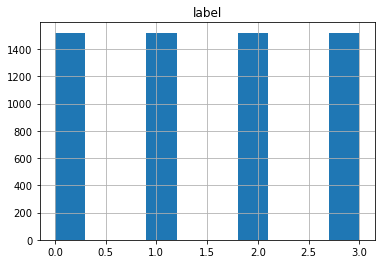

In [1]:
import pandas as pd

df_train = pd.read_json("../data/news_train.json", orient='records')
df_test = pd.read_json("../data/news_test.json", orient='records')
df = pd.concat([df_train, df_test])

df.info()
df.hist()
df.head()

In [2]:
news = df["text"]

news.head()

0    The Organization of the Petroleum Exporting Co...
1    American business tycoon Malcolm Glazer has in...
2    NEW YORK (Reuters) - International Business Ma...
3    Unilever, the world #39;s largest maker of foo...
4    Australia #39;s Nathan Baggaley was over the m...
Name: text, dtype: object

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import nltk

nltk.download("stopwords")
nltk.download('punkt')

stop_words = set(stopwords.words("english"))

news = news.apply(lambda row: row.lower())
news = news.apply(lambda row: " ".join([word for word in word_tokenize(row) if not word in stop_words and word.isalpha()]))

news.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/username/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/username/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    organization petroleum exporting countries agr...
1    american business tycoon malcolm glazer increa...
2    new york reuters international business machin...
3    unilever world largest maker food soap cut ear...
4    australia nathan baggaley moon winning silver ...
Name: text, dtype: object

In [4]:
from nltk.stem import PorterStemmer  

stemmer = PorterStemmer()

news = news.apply(stemmer.stem)

news.head()

0    organization petroleum exporting countries agr...
1    american business tycoon malcolm glazer increa...
2    new york reuters international business machin...
3    unilever world largest maker food soap cut ear...
4    australia nathan baggaley moon winning silver ...
Name: text, dtype: object

In [5]:
from nltk.stem import WordNetLemmatizer 

w_n_lemmatizer = WordNetLemmatizer() 

news = news.apply(lambda row: " ".join([w_n_lemmatizer.lemmatize(word) for word in word_tokenize(row)]))

news = news.apply(stemmer.stem)

news.head()

0    organization petroleum exporting country agree...
1    american business tycoon malcolm glazer increa...
2    new york reuters international business machin...
3    unilever world largest maker food soap cut ear...
4    australia nathan baggaley moon winning silver ...
Name: text, dtype: object

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


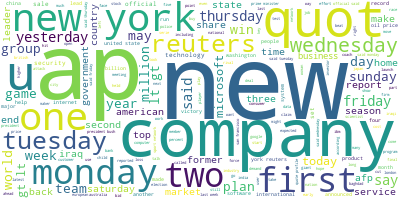

In [7]:
from wordcloud import WordCloud

long_string = ','.join(news)

wordcloud = WordCloud(background_color="white", 
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [8]:
import gensim.corpora as corpora

data_words = [item.split() for item in news]

id2word = corpora.Dictionary(data_words)

print(id2word)

Dictionary(15638 unique tokens: ['agreed', 'barrel', 'country', 'day', 'exporting']...)


In [9]:
corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [10]:
import gensim

num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10)

lda_model.print_topics()

[(0,
  '0.014*"reuters" + 0.009*"saturday" + 0.008*"police" + 0.008*"said" + 0.007*"win" + 0.007*"samarra" + 0.007*"space" + 0.006*"buffalo" + 0.006*"way" + 0.005*"team"'),
 (1,
  '0.010*"india" + 0.008*"yesterday" + 0.007*"u" + 0.007*"said" + 0.006*"first" + 0.005*"quot" + 0.005*"company" + 0.004*"network" + 0.004*"set" + 0.004*"friday"'),
 (2,
  '0.007*"one" + 0.007*"million" + 0.007*"gt" + 0.007*"lt" + 0.006*"year" + 0.006*"bank" + 0.006*"report" + 0.006*"said" + 0.006*"new" + 0.005*"high"'),
 (3,
  '0.010*"tuesday" + 0.008*"oil" + 0.008*"unit" + 0.007*"largest" + 0.007*"first" + 0.007*"said" + 0.007*"jones" + 0.006*"dow" + 0.006*"new" + 0.006*"company"'),
 (4,
  '0.010*"ap" + 0.009*"say" + 0.008*"record" + 0.008*"still" + 0.007*"game" + 0.007*"since" + 0.006*"year" + 0.006*"team" + 0.006*"football" + 0.005*"one"'),
 (5,
  '0.008*"need" + 0.008*"new" + 0.007*"said" + 0.007*"say" + 0.006*"second" + 0.006*"today" + 0.006*"medium" + 0.006*"john" + 0.006*"theme" + 0.005*"week"'),
 (6,
 

In [11]:
# pip install pyLDAvis

In [16]:
import os
import pyLDAvis
import pickle 

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('../data/lda_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, '../data/lda_'+ str(num_topics) +'.html')

LDAvis_prepared

/anaconda/envs/py37_default/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.045870 -0.028322       1        1  12.518345
8      0.098124 -0.035919       2        1  12.517401
3      0.003404 -0.000748       3        1  12.269325
1      0.034527  0.011915       4        1  10.840206
9     -0.004282 -0.099926       5        1   9.478718
2      0.091277  0.054212       6        1   9.436587
5     -0.112072 -0.075376       7        1   8.949796
4     -0.100061 -0.003431       8        1   8.695200
0     -0.079702  0.168311       9        1   8.014271
6      0.114655  0.009283      10        1   7.280151, topic_info=           Term        Freq       Total Category  logprob  loglift
113          gt  519.000000  519.000000  Default  30.0000  30.0000
117          lt  516.000000  516.000000  Default  29.0000  29.0000
634       india  188.000000  188.000000  Default  28.0000  28.0000
2344       unit  130.000000  130.000000  Default  27.0000  27.0000
1081       need  135.000000  135.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
10          one   35.934077  393.758061  Topic10  -5.4381   0.2260
3004          p   31.649257  103.118483  Topic10  -5.5651   1.4389
348   yesterday   32.746212  296.176095  Topic10  -5.5310   0.4179
38          new   33.684046  594.524926  Topic10  -5.5027  -0.2507
149        next   31.840301  223.621437  Topic10  -5.5590   0.6708

[679 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1808      1  0.025948  aboard
1808      2  0.882225  aboard
1808      4  0.025948  aboard
1808      5  0.025948  aboard
1808     10  0.025948  aboard
...     ...       ...     ...
1907      1  0.029851   yukos
1907      2  0.014926   yukos
1907      3  0.880606   yukos
1907      5  0.014926   yukos
1907     10  0.029851   yukos

[2975 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 4, 2, 10, 3, 6, 5, 1, 7])